Part 1

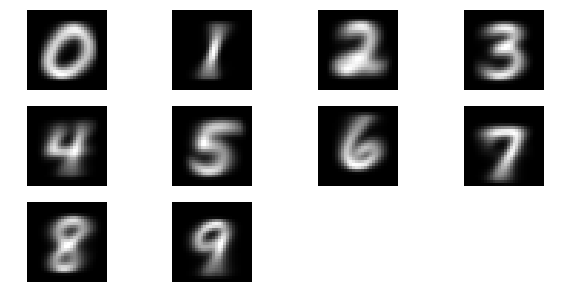

In [232]:
import scipy.io
import numpy as np

train_mat = scipy.io.loadmat('mnist_train.mat')
train_data = train_mat['images']
train_labels = train_mat['labels']
 
test_mat = scipy.io.loadmat('mnist_test.mat')
test_data = test_mat['t10k_images']
test_labels = test_mat['t10k_labels']

digits = range(10)

indices = dict(zip(digits, list(map(lambda x: np.where(train_labels == x), digits))))
imgs = dict(zip(digits, list(map(lambda x: np.take(train_data, indices[x][0], axis=1), digits))))
avgs = dict(zip(digits, list(map(lambda x: np.mean(imgs[x], axis=1, keepdims=True), digits))))

import matplotlib.pyplot as plt
#%matplotlib inline

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10,5))
for i in digits:
    X = avgs[i]
    y_ind = i % 4
    x_ind = int(i / 4)
    axes[x_ind, y_ind].imshow( X.reshape(28,28).T, interpolation='nearest', cmap="gray")
    axes[x_ind, y_ind].axis('off')
axes[2,3].axis('off')
axes[2,2].axis('off')

plt.show()

Part 2

Part 2 classification error: [ 0.1797]


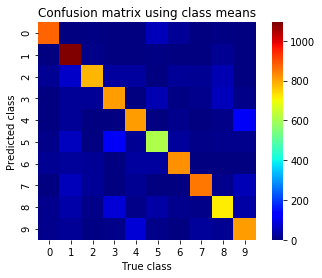

In [233]:
import seaborn

sigma = np.eye( 784 )

data = test_data

diffs = np.array(list(map(lambda x: avgs[x] - data, digits)))
probs = np.array(list(map(lambda x: np.exp(-0.5 * np.sum(diffs[x] * np.dot(sigma, diffs[x]), axis=0, keepdims=True)), digits)))
means = np.array(list(map(lambda x: np.argmax(probs[:,:,x], axis=0), range(len(test_data[0])))))
tuples = zip(test_labels, means)

confusion = np.zeros((10, 10))
correct = 0
total = 0
for dub in tuples:
    correct += (dub[0] == dub[1])
    total += 1
    confusion[dub] += 1
print('Part 2 classification error: '+str(1.0 - (correct / total)))
axy = plt.subplot()
axy = seaborn.heatmap(confusion, cmap='jet', square=True)
axy.set_ylabel('Predicted class')
axy.set_xlabel('True class')
axy.set_title('Confusion matrix using class means')
plt.show()

Part 3

Part 3 classification error: [ 0.04]


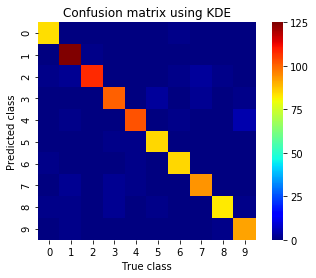

In [234]:
testers = test_data[:,:1000]
classies = []
for i in range(1000):
    X = testers[:, i:i+1]
    probs = []
    #probs = [np.mean(np.exp(-0.5*np.sum())) for j in digits]
    for j in digits:
        diff = X - imgs[j]
        prob = np.exp( -0.5 * np.sum( diff * np.dot(sigma, diff), axis=0, keepdims=True ) )
        mean = np.mean( prob )
        probs.append(mean)
    classies.append(np.argmax(probs))
    
tuples = zip(test_labels, classies)
confusion = np.zeros((10, 10))
correct = 0
total = 0
for dub in tuples:
    correct += (dub[0] == dub[1])
    total += 1
    confusion[dub] += 1
print('Part 3 classification error: '+str(1.0 - (correct / total)))
axx = plt.subplot()
axx = seaborn.heatmap(confusion, cmap='jet', square=True)
axx.set_ylabel('Predicted class')
axx.set_xlabel('True class')
axx.set_title('Confusion matrix using KDE')
plt.show()